In [1]:
#Import libraries

import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

#Download dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


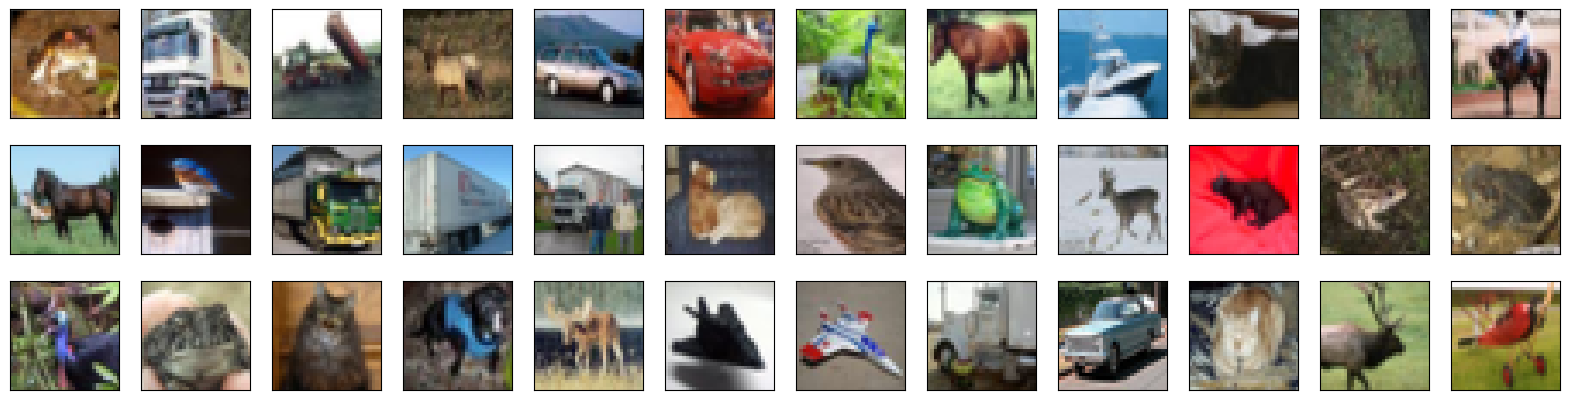

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))


In [3]:
# normalize inputs from 0-255 to 0.0-1.0
#Normalize pixel values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
x_train=np.dot(x_train[...,:3], [0.299, 0.587, 0.114])
x_test=np.dot(x_test[...,:3], [0.299, 0.587, 0.114])
# add empty color dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [5]:

#Split the dataset into train and valid
s = StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=1/6)
train_index, valid_index = next(s.split(x_train, y_train))
x_valid, y_valid = x_train[valid_index], y_train[valid_index]
x_train, y_train = x_train[train_index], y_train[train_index]
print(x_train.shape, x_valid.shape, x_test.shape)

(41666, 32, 32, 1) (8334, 32, 32, 1) (10000, 32, 32, 1)


In [6]:
# modelo com 3 camadas convolucionais
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 32, 32, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                        

In [9]:
# Compile model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Fit the model

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/10
326/326 [==============================] - 747s 2s/step - loss: 2.3889 - accuracy: 0.2739 - val_loss: 4.9176 - val_accuracy: 0.1389
Epoch 2/10
326/326 [==============================] - 717s 2s/step - loss: 1.5720 - accuracy: 0.4513 - val_loss: 1.2479 - val_accuracy: 0.5819
Epoch 3/10
326/326 [==============================] - 706s 2s/step - loss: 1.2398 - accuracy: 0.5673 - val_loss: 1.0285 - val_accuracy: 0.6478
Epoch 4/10
326/326 [==============================] - 719s 2s/step - loss: 1.0520 - accuracy: 0.6335 - val_loss: 0.9223 - val_accuracy: 0.6788
Epoch 5/10
326/326 [==============================] - 722s 2s/step - loss: 0.9422 - accuracy: 0.6718 - val_loss: 0.8390 - val_accuracy: 0.7121
Epoch 6/10
326/326 [==============================] - 727s 2s/step - loss: 0.8572 - accuracy: 0.7017 - val_loss: 0.8073 - val_accuracy: 0.7212
Epoch 7/10
326/326 [==============================] - 728s 2s/step - loss: 0.7790 - accuracy: 0.7303 - val_loss: 0.8440 - val_accuracy: 0.7137

Accuracy: 73.84%


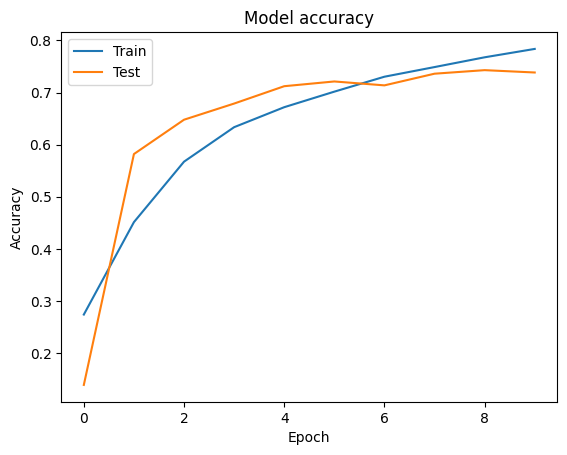

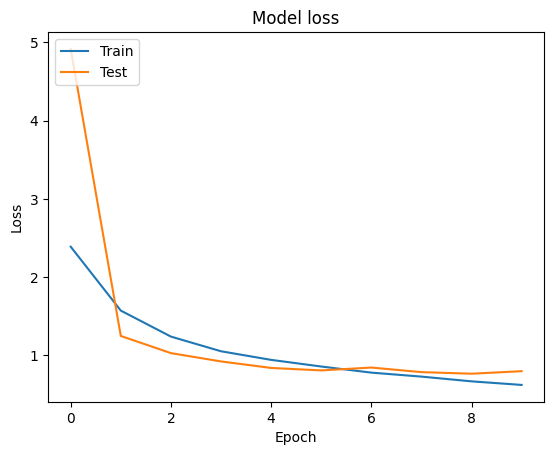

In [12]:
# Final evaluation of the model

scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [20]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print('Class Names: ', classes)
print('Class Labels: ', np.unique(y_train))

Class Names:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Class Labels:  [0 1 2 3 4 5 6 7 8 9]


1/1 [==============================] - 0s 33ms/step


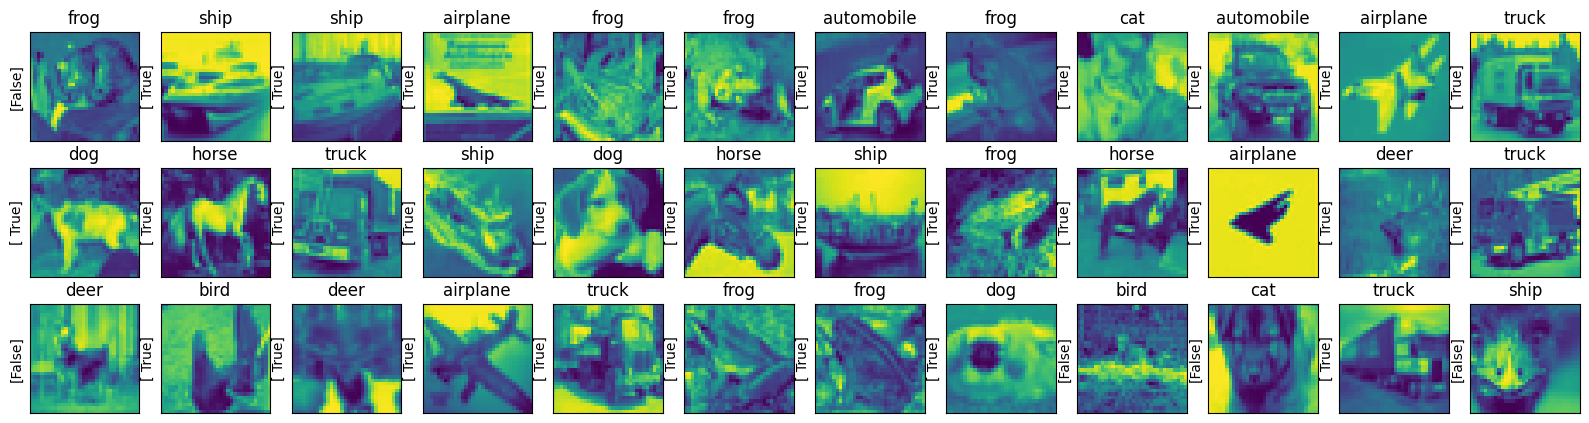

In [22]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[i]))
    predict = np.argmax(model.predict(x_test[i].reshape(1, 32, 32, 1))[0], axis=-1)
    ax.set_title("{}".format(classes[predict]))
    #ax.set_xlabel("{}".format(classes[y_test[i]]))
    ax.set_ylabel("{}".format(predict == y_test[i]))